In [ ]:
!pip install tensorflow_model_optimization

In [ ]:
!pip install tflite==2.10.0

Populating the interactive namespace from numpy and matplotlib
Shape of the image (43247,)


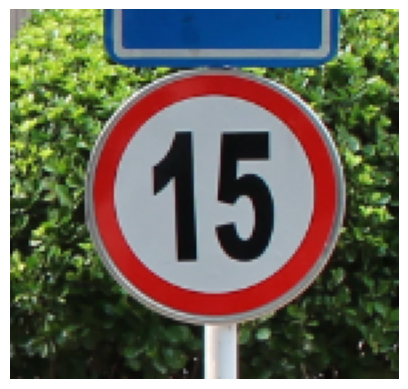

Shape of the image (39895,)


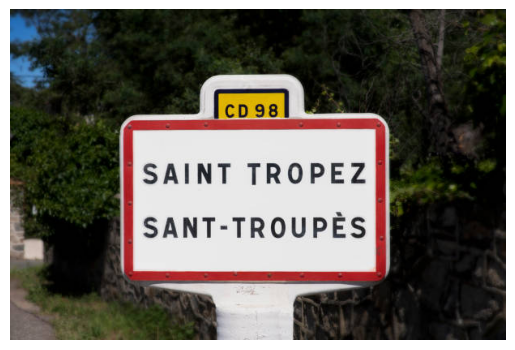

In [ ]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow_model_optimization as tfmot
from tensorflow import lite

%pylab inline

url_code = r'https://github.com/Rianesmili/projet-detection-panneau-tf/blob/main/Paneau/paneau_du_code_de_la_route.png?raw=true'
resp = requests.get(url_code, stream=True).raw
image_array_code = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_code.shape}')
image_code = cv2.imdecode(image_array_code, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_code, cv2.COLOR_BGR2RGB))
plt.show()

url_ville = r'https://github.com/Rianesmili/projet-detection-panneau-tf/blob/main/Paneau/paneau_de_ville.jpg?raw=true'
resp = requests.get(url_ville, stream=True).raw
image_array_ville = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_ville.shape}')
image_ville = cv2.imdecode(image_array_ville, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_ville, cv2.COLOR_BGR2RGB))
plt.show()

(40, 40, 3)
(40, 40)
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  

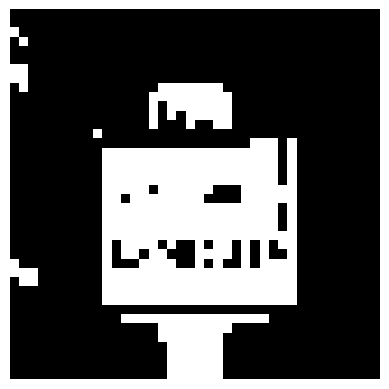

(40, 40, 3)
(40, 40)
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  
000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  

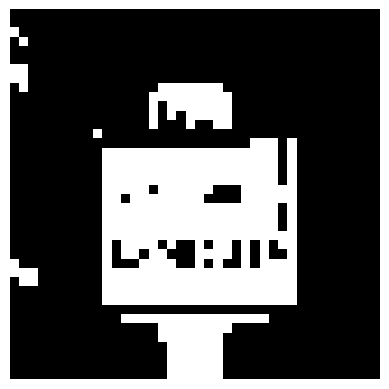

(40, 40, 3)
(40, 40)
255  255  255  255  000  255  255  255  255  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  000  255  000  255  255  000  000  
255  255  000  255  255  255  000  000  255  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  000  000  255  000  255  255  255  
255  255  255  255  255  255  255  255  000  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  000  000  000  000  000  255  000  
255  255  255  255  255  255  000  000  255  255  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  000  255  000  000  255  000  255  255  000  
255  255  255  255  000  000  255  255  255  255  000  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  000  255  

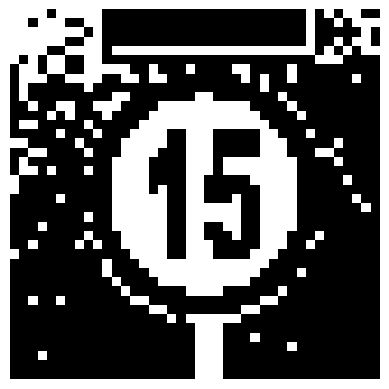

In [ ]:
res = cv2.resize(image_ville , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)
res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

res = cv2.resize(image_ville , dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)

res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res
for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

res = cv2.resize(image_code, dsize=(40,40), interpolation=cv2.INTER_CUBIC)
print(res.shape)
res = cv2.cvtColor(res,cv2.COLOR_RGB2GRAY) #TO 3D to 1D
print(res.shape)

res = cv2.threshold(res, 127, 255, cv2.THRESH_BINARY)[1]
d = res

for row in range(0,40):
    for col in range(0,40):
        print('%03d ' %d[row][col],end=' ')
    print('')

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

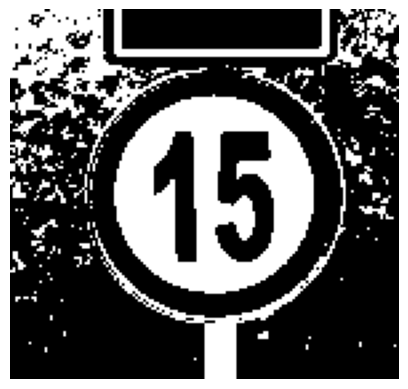

In [ ]:
#Convert to bw
img_bw = cv2.imdecode(image_array_code, cv2.IMREAD_GRAYSCALE)
(thresh, img_bw) = cv2.threshold(img_bw, 127, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_bw, cv2.COLOR_BGR2RGB))

[[0 0 0]
 [0 1 0]
 [0 0 0]]


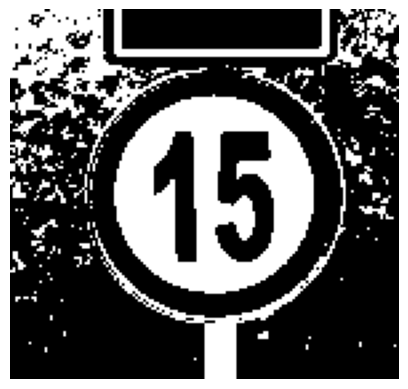

In [ ]:
#defining an identity kernel, will change nothing because each pixel will remain with is value
kernel = np.matrix([[0,0,0],[0,1,0],[0,0,0]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[-10   0  10]
 [-10   0  10]
 [-10   0  10]]


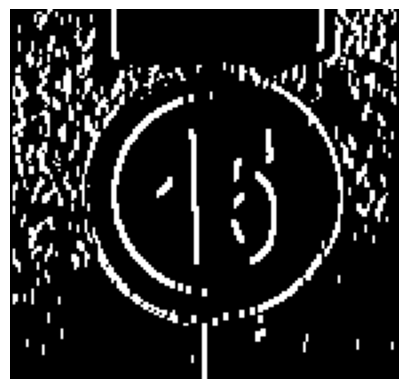

In [ ]:
#defining a vertical edge detection kernel
kernel = np.matrix([[-10,0,10],[-10,0,10],[-10,0,10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

[[ 10  10  10]
 [  0   0   0]
 [-10 -10 -10]]


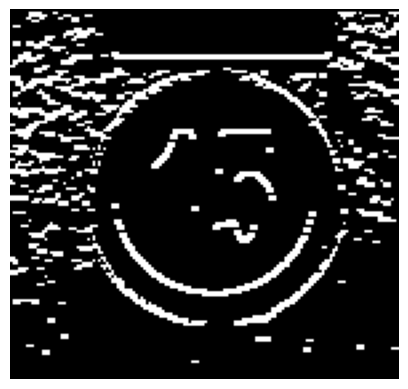

In [ ]:
#defining an horizontal edge detection kernel
kernel = np.matrix([[10,10,10],[0,0,0],[-10,-10,-10]])
print(kernel)
img_1 = cv2.filter2D(img_bw, -1, kernel)
plt.axis('off')
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

On telecharge et dezip le fichier qui contient notre dataset

In [ ]:
#Import dataset
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/Rianesmili/projet-detection-panneau-tf/blob/main/Paneau/dataset.zip?raw=true",
    extract=False)

data_test_dir = tf.keras.utils.get_file(
    "test_data.zip",
    "https://github.com/Rianesmili/projet-detection-panneau-tf/blob/main/Paneau/test_data.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

with zipfile.ZipFile(data_test_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/test')

data_dir = pathlib.Path('/content/datasets/dataset')
data_validation_dir = pathlib.Path('/content/datasets/test')

print(data_dir)
print(os.path.abspath(data_dir))

/content/datasets/dataset
/content/datasets/dataset


In [ ]:
#on liste le nombre d'l'ement de notre dataset
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

1867


In [ ]:
# rm -rf /content/datasets/test_data

In [ ]:
#on liste le nombre d'l'ement de notre dataset
image_count = len(list(data_validation_dir.glob('*/*')))
print(image_count)

2232


On vas utiliser une fonctionkeras  pour pre processer le jeu de deonnée pour les mettre dans la meme taailel et de les grouper pour les envoyer en groupe via un btach

batch_size = 3
img_height = 200
img_width = 200

In [ ]:
batch_size = 32
img_height = 200
img_width = 200

Dans ce code il ne permet que chaque classe correspond a un folder du meme nom

Construire le jeux entrainement


In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

Found 1867 files belonging to 2 classes.
Using 1494 files for training.


Construire le jeux de validation

In [ ]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_validation_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2232 files belonging to 1 classes.
Using 446 files for validation.


In [ ]:
class_names = train_data.class_names
print(class_names)

['panneau_code_de_la_route', 'panneau_de_ville']


Un echantillion correspandant au batch size on a batch size = 4 on vas avoir quatres images

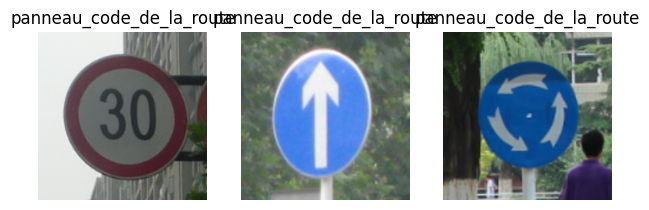

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Définition du reseau de neurones convolutionnel



In [ ]:
from tensorflow.keras import layers

num_classes =  2 #

model = tf.keras.Sequential([ #kerasSequantial qui vas nous servir de conteneur
    layers.experimental.preprocessing.Rescaling(1./255), #rescaling
                              #definir les differantes couches
    layers.Conv2D(128,4, activation='relu'),  #couche de convolution
    layers.MaxPooling2D(), # couche de pooling
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    #layers.Conv2D(16,4, activation='relu'),
    #layers.MaxPooling2D(), #max pooling prend le maximum a chaque fois il exsite d'autres qui prennent la moyenne avrege
    #ces couches seront une suite de convolution et de poolig aui seront de plus en plus petit
    #layers.Conv2D(8,4, activation='relu'),
    #layers.MaxPooling2D(),
    layers.Flatten(), #flatten permet de construire un vecteur a partir de la matrice
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax') #softmax pour avoir la probabilité entre les differantes classes
])

On vas alors compiler notre model que l'on a défini

In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

In [ ]:
logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

In [ ]:
model.fit(
    train_data,
  validation_data=validation_data,
  epochs=10, #on entraine le model sur 20 epochs
  callbacks=[tensorboard_callback]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 12s 187ms/step - loss: 0.1861 - accuracy: 0.9558 - val_loss: 0.1070 - val_accuracy: 0.9664
Epoch 2/10
47/47 [==============================] - 7s 128ms/step - loss: 0.0358 - accuracy: 0.9866 - val_loss: 0.0236 - val_accuracy: 0.9910
Epoch 3/10
47/47 [==============================] - 6s 118ms/step - loss: 0.0137 - accuracy: 0.9967 - val_loss: 0.0316 - val_accuracy: 0.9910
Epoch 4/10
47/47 [==============================] - 6s 121ms/step - loss: 0.0604 - accuracy: 0.9826 - val_loss: 0.0609 - val_accuracy: 0.9709
Epoch 5/10
47/47 [==============================] - 6s 120ms/step - loss: 0.0295 - accuracy: 0.9893 - val_loss: 0.4468 - val_accuracy: 0.8318
Epoch 6/10
47/47 [==============================] - 6s 125ms/step - loss: 0.0282 - accuracy: 0.9886 - val_loss: 0.3133 - val_accuracy: 0.8341
Epoch 7/10
47/47 [==============================] - 6s 118ms/step - loss: 0.0141 - accuracy: 0.9973 - val_loss: 0.1206 - val_accuracy: 0.9641
Epoch 8/10
47/47

Afficher l'integralitée du réseau de neurones

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 98, 98, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 47, 47, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 44, 44, 32)       

In [ ]:
model.evaluate(validation_data)

14/14 [==============================] - 1s 33ms/step - loss: 0.1098 - accuracy: 0.9552


[0.10977420210838318, 0.9551569223403931]

In [ ]:
# Convertir le modèle en TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Enregistrer le modèle TFLite dans un fichier
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Charger le modèle TFLite
interpreter = tf.lite.Interpreter(model_path="./model.tflite")
interpreter.allocate_tensors()

In [ ]:
# Obtenez les détails d'entrée et de sortie du modèle
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
!pip install tflite==2.10.0

**1 Post Training Quantization**

Without quantization



With quantization



Once you have above files saved to a disk, check their sizes. Quantized model will be smaller

**Quantization aware training**

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


> Indented block


q_aware_model.summary()

In [ ]:
print(class_names)

['panneau_code_de_la_route', 'panneau_de_ville']


**Debut Converssion en TFLITE**

TEST DU MODEL LITE